<a href="https://colab.research.google.com/github/vidorc/PyTorch-for-Deep-Learning-A-Comprehensive-Study-Guide/blob/main/04_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [122]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [123]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [124]:
len(train_data) , len(test_data)

(60000, 10000)

In [125]:
image , label = train_data[0]
print(image.size())

torch.Size([1, 28, 28])


In [126]:
class_name = train_data.classes
print(class_name)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [127]:
class_to_index = train_data.class_to_idx
print(class_to_index)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [128]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [129]:
print(f"image shape : {image.shape}")
print(f"label : {label}")

image shape : torch.Size([1, 28, 28])
label : 9


image shape : torch.Size([1, 28, 28])
label : 9


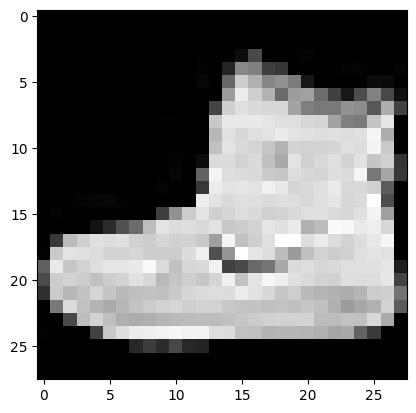

In [130]:
import matplotlib.pyplot as plt
image , label = train_data[0]
print(f"image shape : {image.shape}")
print(f"label : {label}")
plt.imshow(image.squeeze(),cmap='gray')
plt.show()

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


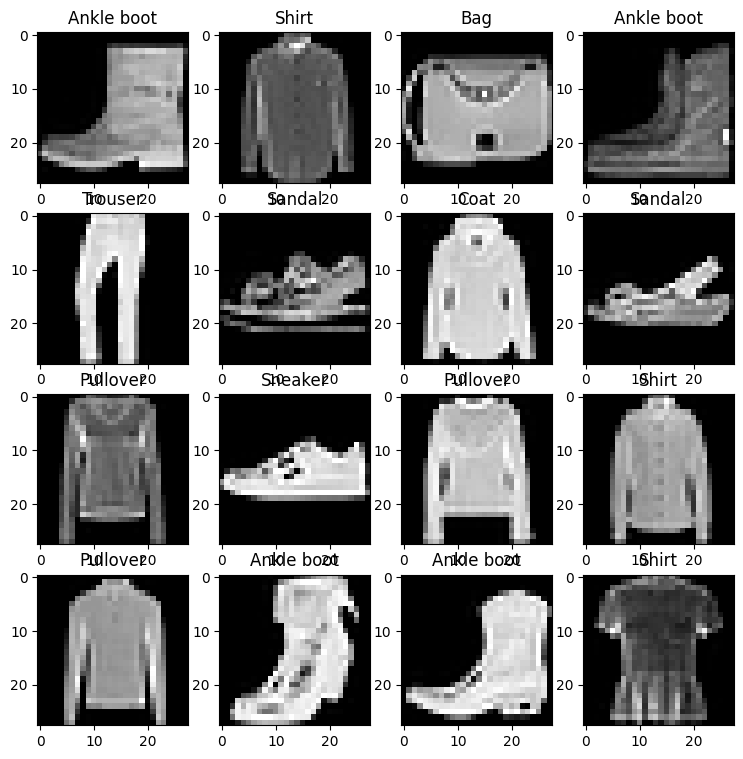

In [131]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),(1,)).item()
    print(random_idx)
    image , label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(class_name[label])

In [132]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [133]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=32,shuffle=False)

In [134]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f16973d2590>,
 <torch.utils.data.dataloader.DataLoader at 0x7f16a14e6e90>)

In [135]:
print(f"train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")
print(f"train data : {len(train_data)}")
print(f"test data : {len(test_data)}")

train dataloader : 1875 batches of 32
test dataloader : 313 batches of 32
train data : 60000
test data : 10000


In [136]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features_batch.size()}")
print(f"Labels batch shape : {train_labels_batch.size()}")

Feature batch shape : torch.Size([32, 1, 28, 28])
Labels batch shape : torch.Size([32])


In [137]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_data),(1,)).item()
image , label = train_data[random_idx]
print(f"image shape : {image.shape}")
print(f"label : {label}")

image shape : torch.Size([1, 28, 28])
label : 9


Image size : torch.Size([1, 28, 28])
Label : 9 (Ankle boot)


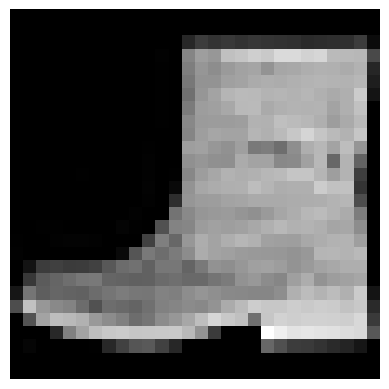

In [138]:
plt.imshow(image.squeeze(),cmap='gray')
plt.axis(False)
print(f"Image size : {image.shape}")
print(f"Label : {label} ({class_name[label]})")

In [139]:
flatten_model=nn.Flatten()
x = train_features_batch[0]
print(f"Shape before flatten : {x.shape}")
x = flatten_model(x)
print(f"Shape after flatten : {x.shape}")
output = flatten_model(x)

Shape before flatten : torch.Size([1, 28, 28])
Shape after flatten : torch.Size([1, 784])


In [140]:
from torch import nn
class FaishonMNISTModelV0 (nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [141]:
torch.manual_seed(42)
model_0 = FaishonMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=10
).to("cpu")
model_0

FaishonMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [142]:
dummy_input = torch.rand(32,784)
print(f"Input shape : {dummy_input.shape}")
output = model_0(dummy_input)
print(f"Output shape : {output.shape}")

Input shape : torch.Size([32, 784])
Output shape : torch.Size([32, 10])


In [143]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [144]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


helper_functions.py already exists


In [145]:
from helper_functions import accuracy_fn

In [146]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [147]:
from timeit import  default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [148]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time , end=end_time ,device='cpu')

Train time on cpu: 0.000 seconds


4.888100011157803e-05

In [149]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:", {epoch})
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss_train = loss(y_pred,y)
    optimizer.zero_grad()
    loss_train = loss(y_pred,y)
    train_loss += loss_train
    loss_train.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_data)} samples.")

      train_loss/=(batch+1)
      print(f"Train loss : {train_loss}")
      test_loss,test_acc = 0,0
      model_0.eval()
      with torch.inference_mode():
        for X_test,y_test in test_dataloader:
          test_pred = model_0(X_test)
          loss_test = loss(test_pred,y_test)
          test_loss += loss_test.clone()
          test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
      test_loss = test_loss.clone() / len(test_dataloader)
      test_acc /= len(test_dataloader)
      print(f"Test loss : {test_loss}")
      print(f"Test acc : {test_acc}")
train_time_end_on_cpu = timer()
train_time_model_0 = print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: {0}
Looked at 0/60000 samples.
Train loss : 2.366476535797119
Test loss : 2.3208961486816406
Test acc : 15.115814696485623
Looked at 12800/60000 samples.
Train loss : 0.7930365800857544
Test loss : 0.7165123820304871
Test acc : 71.30591054313099
Looked at 25600/60000 samples.
Train loss : 0.28993624448776245
Test loss : 0.5962220430374146
Test acc : 77.78554313099042
Looked at 38400/60000 samples.
Train loss : 0.18200421333312988
Test loss : 0.5310074687004089
Test acc : 80.11182108626198
Looked at 51200/60000 samples.
Train loss : 0.1274300217628479
Test loss : 0.5078408122062683
Test acc : 81.85902555910543
Epoch: {1}
Looked at 0/60000 samples.
Train loss : 0.5545473694801331
Test loss : 0.5166405439376831
Test acc : 82.04872204472844
Looked at 12800/60000 samples.
Train loss : 0.4786631166934967
Test loss : 0.4899939000606537
Test acc : 82.76757188498402
Looked at 25600/60000 samples.
Train loss : 0.24704641103744507
Test loss : 0.4787352383136749
Test acc : 83.13698083067092

In [150]:
torch.manual_seed(42)
def eval_model(model: nn.Module, data_loader: DataLoader, loss_fn: nn.Module,accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
  loss = loss.clone() / len(data_loader)
  acc /= len(data_loader)
  return {'model_name':model.__class__.__name__,'model_loss':loss.item(),'model_acc':acc}
  model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss,accuracy_fn=accuracy_fn)
  model_0_results

In [151]:
torch.cuda.is_available()
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [152]:
class FaishonMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
    nn.ReLU(),
    nn.Linear(in_features=hidden_units,out_features=output_shape)
  def forward(self,x):
    return self.layer_stack(x)

In [153]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [154]:
def train_step(
    model: nn.Module,
  data_loader: DataLoader,
  loss_fn: nn.Module,
  optimizer: torch.optim.Optimizer,
  accuracy_fn,
  device: torch.device
):
 train_loss = 0
 for batch, (X,y) in enumerate(train_dataloader):
  model_0.train()
  y_pred = model_0(X)
  loss=loss_fn(y_pred,y)
  train_loss += loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if batch % 400 == 0:
    print(f"Looked at {batch * len(X)}/{len(train_data)} samples.")
  train_loss /= (batch+1)
  print(f"Train loss : {train_loss}")

In [155]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model(X_test)
      loss_test = loss(test_pred,y_test)
      test_loss += loss_test.clone()
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
      test_accuracy = test_acc / len(test_dataloader)
      test_loss = test_loss.clone() / len(test_dataloader)
      print(f"Test loss : {test_loss}")
      print(f"Test acc : {test_acc}")

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
train_time_end_on_gpu = timer()
print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu)
epochs = 3
from helper_functions import print_train_time

model_1 = FaishonMNISTModelV1(input_shape=784, hidden_units=10, output_shape=10).to(device)

for epoch in tqdm(range(epochs)):
  train_step(model=model_0,data_loader=train_dataloader,loss_fn=loss,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
  print(f"Epoch : {epoch}")
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss,
            accuracy_fn=accuracy_fn,
            device=device)

Train time on None: 0.000 seconds


  0%|          | 0/3 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Train loss : 0.00031720835249871016
Train loss : 0.00033626460935920477
Train loss : 0.0002920394763350487
Train loss : 0.00030403464916162193
Train loss : 0.0003565377846825868
Train loss : 0.00036187798832543194
Train loss : 0.00039259070763364434
Train loss : 0.000266415678197518
Train loss : 0.000411987624829635
Train loss : 0.0003154953592456877
Train loss : 0.0003129300894215703
Train loss : 0.00027129388763569295
Train loss : 0.0004560005327221006
Train loss : 0.0003581219061743468
Train loss : 0.0004843442002311349
Train loss : 0.0002554125676397234
Train loss : 0.00040139778866432607
Train loss : 0.0003643762320280075
Train loss : 0.00037869910011067986
Train loss : 0.0002879697713069618
Train loss : 0.00032669882057234645
Train loss : 0.0003359744732733816
Train loss : 0.00046686295536346734
Train loss : 0.0005116058164276183
Train loss : 0.00018877550610341132
Train loss : 0.0003706048591993749
Train loss : 0.000338657264364

In [ ]:
model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss,accuracy_fn=accuracy_fn)
model_1_results

In [ ]:
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss,accuracy_fn=accuracy_fn)
model_0_results

In [ ]:
class FaishonMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

In [ ]:
self.classifier= nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=hidden_units*0,out_features=output_shape)

    def forward(self, x):
      x = conv_block_1(x)
      print(x.shape)
      x = conv_block_2(x)
      print(x.shape)
      x = classifier(x)
      print(x.shape)
      return x
)

In [120]:
image.shape


torch.Size([1, 28, 28])